# Linear Regression using Scikit Learn

## Linear Regression with One Variable 

In [1]:
%matplotlib inline
# To get nice quality plots
%config InlineBackend.figure_format = 'svg'

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

### Read Data from Dataset

In [2]:
data = pd.read_csv('data/ex1data1.txt', names = ["Population", "Food Truck Profit"])
x = np.c_[data["Population"]] # first column
y = np.c_[data["Food Truck Profit"]] # second column

print(f"Number of samples: {len(y)}")
# Print correlation (measure for linear correlation)
print(data.corr())

# Show first few examples
data.head()

Number of samples: 97
                   Population  Food Truck Profit
Population           1.000000           0.837873
Food Truck Profit    0.837873           1.000000


,Population,Food Truck Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


### Plot Data

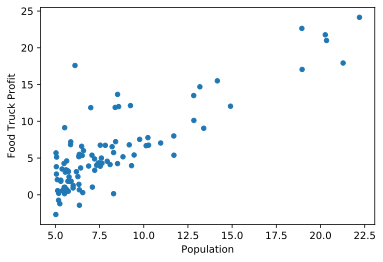

In [3]:
#Plot data
data.plot(kind='scatter', x='Population', y='Food Truck Profit')
plt.show()

### Model

In [4]:
# Select the linear model
lin_reg_model = LinearRegression()

# Train the model
lin_reg_model.fit(x, y)

# Show the results (in scikit-learn the intercept term is stored seperately)
print(lin_reg_model.intercept_, lin_reg_model.coef_)

[-3.89578088] [[1.19303364]]


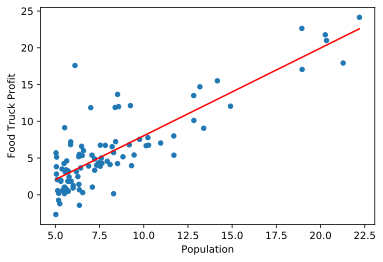

In [5]:
# Plot results
data.plot(kind='scatter', x='Population', y='Food Truck Profit')
lin_reg_predict = lin_reg_model.predict(x)
plt.plot(x, lin_reg_predict, c='r')
plt.show()

In [6]:
from sklearn.metrics import mean_squared_error

# Notice scikit mean squared error doese not divide by 2! (so value here is double as in the manual case)
lin_mse = mean_squared_error(y, lin_reg_predict)
lin_rmse = np.sqrt(lin_mse)
print(lin_rmse)

2.9923139460876023


## Linear Regression with Multiple Variables

### Read Data from Dataset

In [7]:
data2 = pd.read_csv('data/ex1data2.txt', sep = ",", names = ["Size(sqft)", "Nr. Bedrooms", "Price"])
x2 = np.c_[data2["Size(sqft)"], data2["Nr. Bedrooms"]]
y2 = np.c_[data2["Price"]]

print(f"Number of samples: {len(y2)}")
# Print correlation 
print(data2.corr())

m2 = len(y2)
data2.head()

Number of samples: 47
              Size(sqft)  Nr. Bedrooms     Price
Size(sqft)      1.000000      0.559967  0.854988
Nr. Bedrooms    0.559967      1.000000  0.442261
Price           0.854988      0.442261  1.000000


,Size(sqft),Nr. Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


### Plot Data

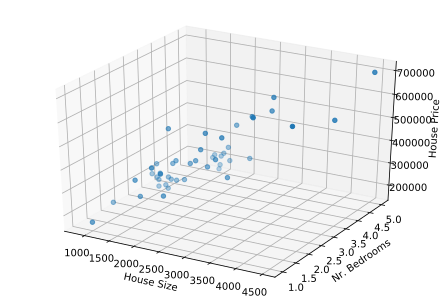

In [8]:
from mpl_toolkits.mplot3d import Axes3D

fig = plt.figure()
ax = Axes3D(fig)

ax.scatter3D(x2[:, 0], x2[:, 1], y2)
ax.set_xlabel('House Size')
ax.set_ylabel('Nr. Bedrooms')
ax.set_zlabel('House Price')
plt.show()

### Feature Scaling

In [9]:
# Perform feature scaling
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
x2_tr = scaler.fit_transform(x2, y2)

### Model

In [10]:
# Select the linear model
lin_reg_model2 = LinearRegression()

# Train the model
lin_reg_model2.fit(x2_tr, y2)

# Show the results (in scikit-learn the intercept term is stored seperately)
print(lin_reg_model2.intercept_, lin_reg_model2.coef_)

[340412.65957447] [[109447.79646964  -6578.35485416]]


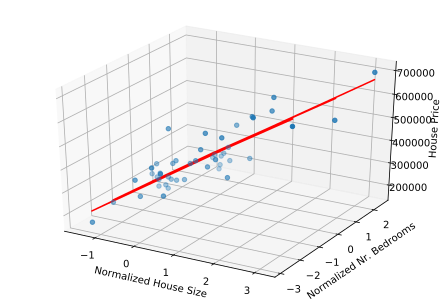

In [11]:
#Visualize solution model
fig = plt.figure()
ax = Axes3D(fig)

lin_reg_predict2 = lin_reg_model2.predict(x2_tr)

ax.scatter3D(x2_tr[:, 0], x2_tr[:, 1], y2)
ax.plot3D(x2_tr[:,0], x2_tr[:,1], lin_reg_predict2.flatten(), c='r')
ax.set_xlabel('Normalized House Size')
ax.set_ylabel('Normalized Nr. Bedrooms')
ax.set_zlabel('House Price')
plt.show()

In [12]:
# Price for a 3 bedroom 1650 sqft house:
price = lin_reg_model2.predict(scaler.transform([[1650, 3]]))[0][0]
print(f"Predicted price for a 3 bedroom, 1650 sqft house: {price}$")

Predicted price for a 3 bedroom, 1650 sqft house: 293081.4643348962$


In [13]:
# Notice scikit mean squared error doese not divide by 2! (so value here is double as in the manual case)
lin_mse2 = mean_squared_error(y2, lin_reg_predict2)
lin_rmse2 = np.sqrt(lin_mse2)
print(f"RMSE: {lin_rmse2}")

RMSE: 63926.2082498693
